# WeatherPy
----
In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your first objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

After each plot add a sentence or too explaining what the code is and analyzing.

Your next objective is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

* Northern Hemisphere - Temperature (F) vs. Latitude
* Southern Hemisphere - Temperature (F) vs. Latitude
* Northern Hemisphere - Humidity (%) vs. Latitude
* Southern Hemisphere - Humidity (%) vs. Latitude
* Northern Hemisphere - Cloudiness (%) vs. Latitude
* Southern Hemisphere - Cloudiness (%) vs. Latitude
* Northern Hemisphere - Wind Speed (mph) vs. Latitude
* Southern Hemisphere - Wind Speed (mph) vs. Latitude

After each pair of plots explain what the linear regression is modelling such as any relationships you notice and any other analysis you may have.

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number and city name.
* Save a CSV of all retrieved data and a PNG image for each scatter plot.

##### Hints and Considerations

* The city data you generate is based on random coordinates as well as different query times; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Once you have computed the linear regression for one chart, the process will be similar for all others. As a bonus, try to create a function that will create these charts based on different parameters.

* Remember that each coordinate will trigger a separate call to the Google API. If you're creating your own criteria to plan your vacation, try to reduce the results in your DataFrame to 10 or fewer cities.

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Test of the citypy package
#lat_lng = str(input(f'Enter latitude and longtitude in form (lat,lng):'))
#lat,lng = lat_lng.split(',')
#city = citipy.nearest_city(float(lat), float(lng))
#set(dir(city))
#print(f"The cooridinates {lat},{lng} nearest city is: {city.city_name},{city.country_code}")


## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

city_country = zip(cities,countries)
# Print the city count to confirm sufficient count
#print([i for i in city_country])
print(len(cities))


632


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).
* Export the city data into a .csv.


In [7]:
# Test of the API call and verification correct data is returned
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "grajau"
country_code = "br"
query_url = f"{url}appid={api_key}&q={city},{country_code}&units={units}"
response = requests.get(query_url).json()
print(query_url)

cityID = int(response['id'])
cityName = response['name']
countryCode = str(response['sys']['country'])
lat_val = float(response['coord']['lat'])
lon_val = float(response['coord']['lon'])
weatherDate = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
temperature = float(response['main']['temp'])
humidity_val = float(response['main']['humidity'])
cloudiness_val = float(response['clouds']['all'])
windSpeed = float(response['wind']['speed'])

print(f"The weather date information received is: {weatherDate}")
print(f"The humidity information received is: {humidity_val}")
print(f"The clouds information received is: {cloudiness_val}")
print(f"The wind speed information received is: {windSpeed}")

http://api.openweathermap.org/data/2.5/weather?appid=6a6e5292617349bd250145ca6faa12c5&q=grajau,br&units=imperial
The weather date information received is: 01/24/20
The humidity information received is: 86.0
The clouds information received is: 100.0
The wind speed information received is: 1.83


In [8]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lists to hold reponse info
city_id = []
city_name = []
country = []
latitude = []
longitude = []
weather_date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Open file to write results of API calls - success or not into a txt file, as well as all data pulled into a csv
myprintlog = open('weatherAPI_printlog.txt', 'w')
myAPIdata = open('weatherAPI_data.csv', 'w')
# Write header line for csv file
myAPIdata.write("city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed\n")

# Loop through the list of tuples of cities,country codes and perform a request for data on each
for city,country_code in city_country:
    query_url = f"{url}appid={api_key}&q={city},{country_code}&units={units}"
    response = requests.get(query_url).json()

    # Try to grab the temp,humidity,cloudiness and wind speed if they are available in the Weather API
    try:
        # Create variables for each response item and format to desired datatype
        cityID = int(response['id'])
        cityName = response['name']
        countryCode = response['sys']['country']
        lat_val = response['coord']['lat']
        lon_val = response['coord']['lon']
        weatherDate = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        temperature = response['main']['temp']
        humidity_val = response['main']['humidity']
        cloudiness_val = response['clouds']['all']
        windSpeed = response['wind']['speed']
        
        # Append retreived values to lists above
        city_id.append(cityID)
        city_name.append(cityName)
        country.append(countryCode)
        latitude.append(lat_val)
        longitude.append(lon_val)
        weather_date.append(weatherDate)
        temp.append(temperature)
        humidity.append(humidity_val)
        cloudiness.append(cloudiness_val)
        wind_speed.append(windSpeed)
        
        # Output line to terminal to mark progress and store it to a print log text file
        print(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        myprintlog.write(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        
        # Output all retreived values to a csv file
        myAPIdata.write(f"{cityID},{cityName},{countryCode},{lat_val},{lon_val},{weatherDate},\
            {temperature},{humidity_val},{cloudiness_val},{windSpeed}\n")
        
    # Handle exceptions for a city that is not available in the Weather API
    except:
        
        print(f"{city},{country_code} was not found in the Weathermap API\n")
        myprintlog.write(f"{city},{country_code} was not found in the Weathermap API\n")
        
        # Append null values so lists are all the same length (later we will remove nulls from dataframe)
        city_id.append(None)
        city_name.append(None)
        country.append(None)
        latitude.append(None)
        longitude.append(None)
        weather_date.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        pass
    
# Close the file handle after completion of the loop
myprintlog.close()
myAPIdata.close()

faya,td was not found in the Weathermap API

Hermanus with city ID:3366880 was found in the Weathermap API

Cape Town with city ID:3369157 was found in the Weathermap API

Atasu with city ID:1526041 was found in the Weathermap API

Rikitea with city ID:4030556 was found in the Weathermap API

Vaini with city ID:4032243 was found in the Weathermap API

Avarua with city ID:4035715 was found in the Weathermap API

Hofn with city ID:2630299 was found in the Weathermap API

Albany with city ID:2077963 was found in the Weathermap API

Leshan with city ID:1804153 was found in the Weathermap API

Torbay with city ID:6167817 was found in the Weathermap API

Ballina with city ID:2966778 was found in the Weathermap API

Lubyany with city ID:533793 was found in the Weathermap API

Krasnovishersk with city ID:542184 was found in the Weathermap API

Kariba with city ID:889215 was found in the Weathermap API

Carnarvon with city ID:2074865 was found in the Weathermap API

Ushuaia with city ID:3833367

Lensk with city ID:2020838 was found in the Weathermap API

Adrar with city ID:2508807 was found in the Weathermap API

Bethel with city ID:5282297 was found in the Weathermap API

Paamiut with city ID:3421193 was found in the Weathermap API

Tual with city ID:1623197 was found in the Weathermap API

Mar del Plata with city ID:3430863 was found in the Weathermap API

Portland with city ID:2152667 was found in the Weathermap API

Geraldton with city ID:2070998 was found in the Weathermap API

Kieta with city ID:2094027 was found in the Weathermap API

Gamboma with city ID:2259947 was found in the Weathermap API

Tasiilaq with city ID:3424607 was found in the Weathermap API

Evensk with city ID:2125693 was found in the Weathermap API

Zyryanka with city ID:2119283 was found in the Weathermap API

Muros with city ID:3115824 was found in the Weathermap API

Ust-Tsilma with city ID:477940 was found in the Weathermap API

Mayumba with city ID:2399001 was found in the Weathermap API

Tessalit

Tuatapere with city ID:2180815 was found in the Weathermap API

Yeppoon with city ID:2142316 was found in the Weathermap API

Touros with city ID:3386213 was found in the Weathermap API

Khash with city ID:1160571 was found in the Weathermap API

Lakatoro with city ID:2136697 was found in the Weathermap API

Supaul with city ID:1255396 was found in the Weathermap API

Kabo with city ID:2386042 was found in the Weathermap API

Avanuorri with city ID:779622 was found in the Weathermap API

Bambous Virieux with city ID:1106677 was found in the Weathermap API

Constitucion with city ID:3893726 was found in the Weathermap API

Fukuecho with city ID:1863997 was found in the Weathermap API

Port Macquarie with city ID:2152659 was found in the Weathermap API

Kars with city ID:743952 was found in the Weathermap API

Dongsheng with city ID:1812256 was found in the Weathermap API

Shakawe with city ID:933077 was found in the Weathermap API

Hualmay with city ID:3939761 was found in the Weatherma

Yulara with city ID:6355222 was found in the Weathermap API

Lethem with city ID:3379316 was found in the Weathermap API

Arrecife with city ID:2521570 was found in the Weathermap API

Dodge City with city ID:5445298 was found in the Weathermap API

Chabahar with city ID:1161724 was found in the Weathermap API

Warrnambool with city ID:2144528 was found in the Weathermap API

Bairiki Village with city ID:7601762 was found in the Weathermap API

Peleduy with city ID:2018069 was found in the Weathermap API

Otane with city ID:2185329 was found in the Weathermap API

Ban Nahin with city ID:1661950 was found in the Weathermap API

Nueva Loja with city ID:3655185 was found in the Weathermap API

Khovd with city ID:1516048 was found in the Weathermap API

Half Moon Bay with city ID:5354943 was found in the Weathermap API

Kommunar with city ID:545788 was found in the Weathermap API

Sembe with city ID:2255304 was found in the Weathermap API

Healesville with city ID:2163701 was found in the 

Okha with city ID:1261066 was found in the Weathermap API

Rovaniemi with city ID:638936 was found in the Weathermap API

Roebourne with city ID:2062276 was found in the Weathermap API

Harper with city ID:2276492 was found in the Weathermap API

luan,cn was not found in the Weathermap API

Asosa with city ID:343292 was found in the Weathermap API

Camocim with city ID:3403687 was found in the Weathermap API

Tiarei with city ID:4033356 was found in the Weathermap API

Marsala with city ID:2524245 was found in the Weathermap API

Gongzhuling with city ID:2037222 was found in the Weathermap API

Port Blair with city ID:1259385 was found in the Weathermap API

Kavieng with city ID:2094342 was found in the Weathermap API

Tiquisio with city ID:3792380 was found in the Weathermap API

Henties Bay with city ID:3356832 was found in the Weathermap API

Magadi with city ID:1264514 was found in the Weathermap API

Saint George with city ID:3573061 was found in the Weathermap API

cumaribo,co wa

### Convert Raw Data to DataFrame
* Display the DataFrame

In [32]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city_id": city_id,
    "city_name": city_name,
    "country": country,
    "latitude": latitude,
    "longitude": longitude,
    "weather_date": weather_date,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed
}
weather_data = pd.DataFrame(weather_dict)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 10 columns):
city_id         569 non-null float64
city_name       569 non-null object
country         569 non-null object
latitude        569 non-null float64
longitude       569 non-null float64
weather_date    569 non-null object
temp            569 non-null float64
humidity        569 non-null float64
cloudiness      569 non-null float64
wind_speed      569 non-null float64
dtypes: float64(7), object(3)
memory usage: 49.5+ KB


In [45]:
# Make a dataframe that has only non-null values (so linear regression can be done later)
weather_data_values = weather_data.dropna()
weather_data_values = weather_data_values.reset_index()
weather_data_values['city_id'] = weather_data_values['city_id'].astype(int)
weather_data_values.head()

,index,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,1,3366880,Hermanus,ZA,-34.42,19.23,01/24/20,66.99,91.0,0.0,16.22
1,2,3369157,Cape Town,ZA,-33.93,18.42,01/24/20,66.31,93.0,75.0,11.41
2,3,1526041,Atasu,KZ,48.68,71.64,01/24/20,24.33,93.0,100.0,20.96
3,4,4030556,Rikitea,PF,-23.12,-134.97,01/24/20,78.39,76.0,0.0,16.31
4,5,4032243,Vaini,TO,-21.20,-175.20,01/24/20,80.60,78.0,20.0,11.41


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

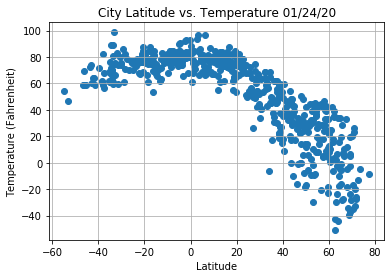

In [36]:
# Build a scatter plot for Latitude vs.Temperature in Fahrenheit
weatherDate = weather_data_values['weather_date'][0]
plt.scatter(weather_data_values["latitude"], weather_data_values["temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Temperature {weatherDate}")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

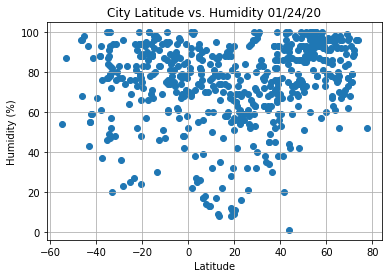

In [37]:
# Build a scatter plot for Latitude vs. Humidity
plt.scatter(weather_data_values["latitude"], weather_data_values["humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity {weatherDate}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

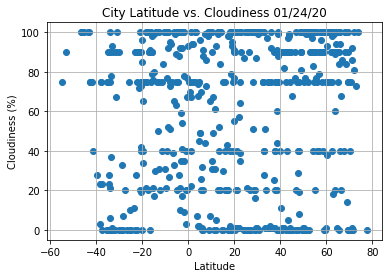

In [38]:
# Build a scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_data_values["latitude"], weather_data_values["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness {weatherDate}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

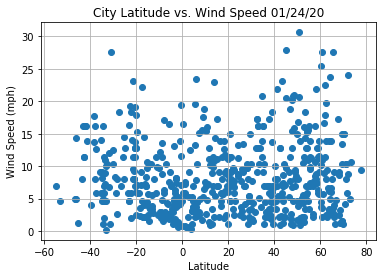

In [39]:
# Build a scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data_values["latitude"], weather_data_values["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed {weatherDate}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()

The r-squared is: 0.05201236066299928


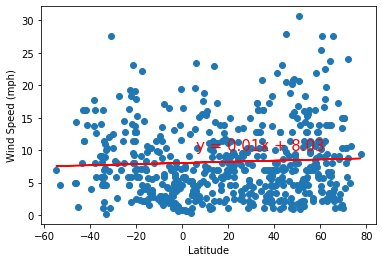

In [40]:
# Print out the r-squared value along with the plot.
x_values = weather_data_values["latitude"]
y_values = weather_data_values["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue}")
plt.show()

## Linear Regression

In [53]:
# OPTIONAL: Create a function to create Linear Regression plots
def make_lin_reg_plot(x_values,y_values,x_desc,y_desc):
    # Print out the r-squared value along with the plot.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"City {x_desc} vs. {y_desc} {weatherDate}")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    plt.show()

In [42]:
# test the function with a call
#make_lin_reg_plot(weather_data_values["latitude"],weather_data_values["wind_speed"],'Latitude','Wind Speed (mph)')

In [46]:
# Create Northern and Southern Hemisphere DataFrames
#weather_data_values.info()
crit_north = weather_data_values.latitude >= 0
crit_south = weather_data_values.latitude < 0

north_weather = weather_data_values[crit_north]
south_weather = weather_data_values[crit_south]
north_weather = north_weather.reset_index(drop=True)
south_weather = south_weather.reset_index(drop=True)
north_weather.head()

,index,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,3,1526041,Atasu,KZ,48.68,71.64,01/24/20,24.33,93.0,100.0,20.96
1,7,2630299,Hofn,IS,64.25,-15.21,01/24/20,34.07,93.0,100.0,23.69
2,9,1804153,Leshan,CN,29.56,103.76,01/24/20,44.73,80.0,100.0,4.61
3,10,6167817,Torbay,CA,47.67,-52.73,01/24/20,28.42,68.0,75.0,12.75
4,11,2966778,Ballina,IE,54.12,-9.17,01/24/20,44.62,100.0,90.0,12.75


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8558512305367084
y = -1.35x + 92.22


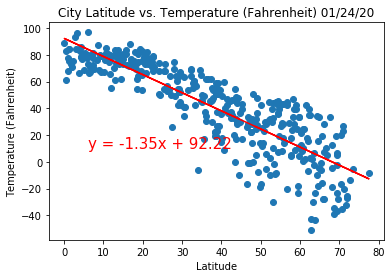

In [54]:
make_lin_reg_plot(north_weather["latitude"],north_weather["temp"],'Latitude',f'Temperature (Fahrenheit)')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5701397602632754
y = 0.38x + 82.62


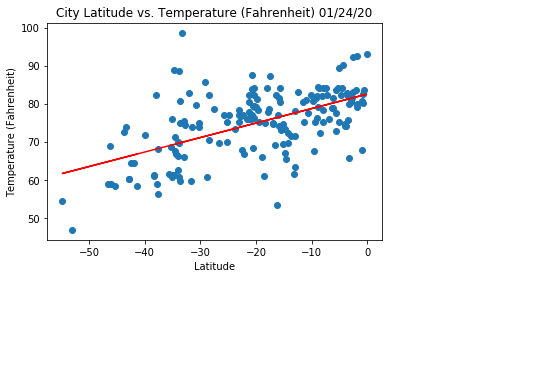

In [55]:
make_lin_reg_plot(south_weather["latitude"],south_weather["temp"],'Latitude',f'Temperature (Fahrenheit)')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.39917760297852406
y = 0.43x + 57.4


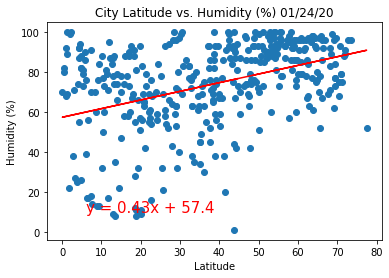

In [60]:
make_lin_reg_plot(north_weather["latitude"],north_weather["humidity"],'Latitude',f'Humidity (%)')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06456450368289682
y = 0.09x + 78.65


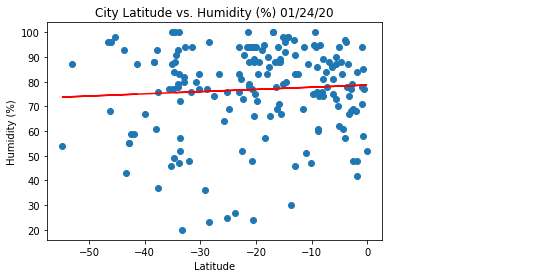

In [61]:
make_lin_reg_plot(south_weather["latitude"],south_weather["humidity"],'Latitude',f'Humidity (%)')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14487224849051034
y = 0.27x + 49.09


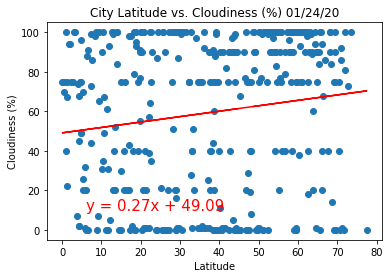

In [59]:
make_lin_reg_plot(north_weather["latitude"],north_weather["cloudiness"],'Latitude',f'Cloudiness (%)')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09890856981438954
y = 0.27x + 64.8


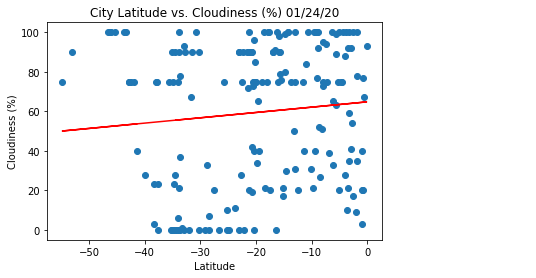

In [62]:
make_lin_reg_plot(south_weather["latitude"],south_weather["cloudiness"],'Latitude',f'Cloudiness (%)')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1279099248570556
y = 0.04x + 6.97


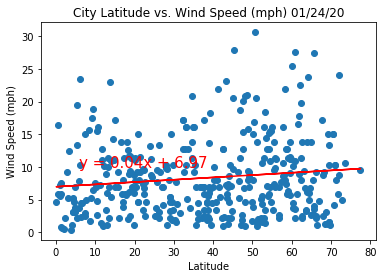

In [63]:
make_lin_reg_plot(north_weather["latitude"],north_weather["wind_speed"],'Latitude',f'Wind Speed (mph)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.24698290159863842
y = -0.1x + 6.03


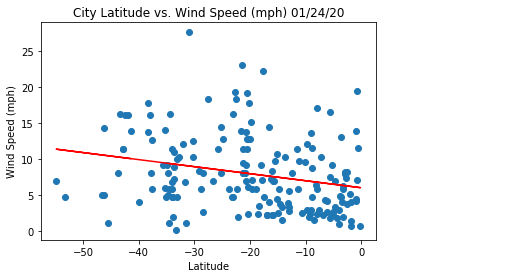

In [64]:
make_lin_reg_plot(south_weather["latitude"],south_weather["wind_speed"],'Latitude',f'Wind Speed (mph)')